## This notebook separates the labeled training data into two parts, each with class labels, for rapid testing and evaluation. Reports evaluation metrics at the end of the notebook

In [199]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries
import time
import pandas as pd
from pandas.plotting import scatter_matrix
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

# For producing decision tree diagrams.
from IPython.core.display import Image, display

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Set the randomizer seed so results are the same each time
np.random.seed(0)

raw_data = pd.read_csv(r"../../data/covtype.csv") #https://www.kaggle.com/uciml/forest-cover-type-dataset
train_df = pd.read_csv(r"../../data/train.csv") #https://www.kaggle.com/c/forest-cover-type-prediction/data
test_df = pd.read_csv(r"../../data/test.csv") #https://www.kaggle.com/c/forest-cover-type-prediction/data

In [200]:
test_labeled = raw_data[15120:]

test_labeled

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15120,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,1
15121,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,1
15122,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,1
15123,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,1
15124,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [201]:
# show that this matches the above
test_df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565887,581008,2396,153,20,85,17,108,240,237,118,...,0,0,0,0,0,0,0,0,0,0
565888,581009,2391,152,19,67,12,95,240,237,119,...,0,0,0,0,0,0,0,0,0,0
565889,581010,2386,159,17,60,7,90,236,241,130,...,0,0,0,0,0,0,0,0,0,0
565890,581011,2384,170,15,60,5,90,230,245,143,...,0,0,0,0,0,0,0,0,0,0


In [202]:
# create correct labels df with index
test_labels_correct = pd.DataFrame(data = test_labeled, 
                                   index = test_df.loc[:, "Id"],
                                  columns = ["Cover_Type"])

# overwrite last value from NaN to correct label
test_labels_correct.loc[581012, "Cover_Type"] = 3

# cast back to int
test_labels_correct = test_labels_correct.astype("int32")

test_labels_correct

,Cover_Type
Id,
15121,1
15122,1
15123,1
15124,1
15125,1
...,...
581008,3
581009,3
581010,3


In [203]:
# extract labels from training data
train_labels_df = train_df.loc[:, "Cover_Type"]

# extract training data except labels and ID column
train_df = train_df.loc[:, (train_df.columns != "Cover_Type") & 
                        (train_df.columns != "Id")]

train_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0


In [204]:
# extract indices of testing data for scoring
test_index_df = test_df.loc[:, "Id"]

# extract test data except ID column
test_df = test_df.loc[:, test_df.columns != "Id"]

test_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
1,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
2,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
3,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
4,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0


In [205]:
def PrintResults():
    # generate and print classification report
    print(classification_report(test_labels_correct, log_predictions_df))

    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

    for title, normalize in titles_options:
        disp = plot_confusion_matrix(log_model, test_df, test_labels_correct,
                                     display_labels= [str(number) for number in range(1, 8)],
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
        fig = plt.gcf()
        fig.set_size_inches(8,5)

    plt.show()

    # calculate and print accuracy
    print("Overall accuracy: " + 
          str(round(100*metrics.accuracy_score(test_labels_correct, log_predictions_df),2)) + "%")

# Build Base Model as starting point

In [206]:
# create initial model
log_model = LogisticRegression()

# fit to training data
log_model.fit(train_df, train_labels_df)

# supply the test_df to log_model and create predictions
log_predictions = log_model.predict(test_df)

# converts predictions from np array to pd dataframe
log_predictions_df = pd.DataFrame(data = log_predictions, 
                                  index = test_index_df, 
                                  columns = ["Cover_Type"])

              precision    recall  f1-score   support

           1       0.58      0.37      0.46    209679
           2       0.74      0.41      0.53    281141
           3       0.44      0.41      0.43     33595
           4       0.03      0.65      0.06       587
           5       0.04      0.47      0.07      7333
           6       0.08      0.20      0.11     15207
           7       0.11      0.65      0.19     18350

    accuracy                           0.40    565892
   macro avg       0.29      0.45      0.26    565892
weighted avg       0.62      0.40      0.47    565892



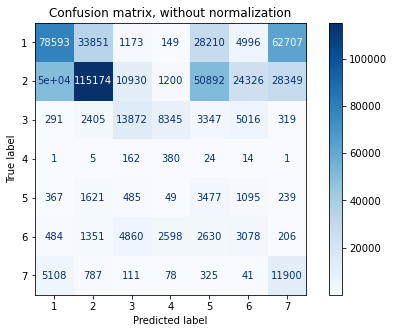

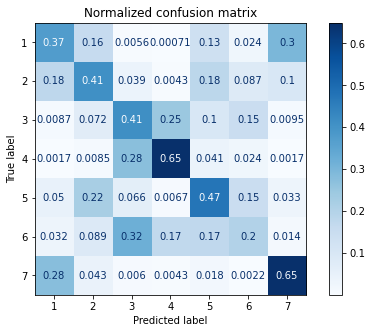

Overall accuracy: 40.02%


In [207]:
PrintResults()

# Run Gid Search and Loop to find best parameters

In [208]:
## Use grid search to evaluate parameters

# choose variables for grid search
parameters={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

# build classifier
classifier = GridSearchCV(LogisticRegression(solver="liblinear", multi_class="auto"), 
                          param_grid = parameters, cv = 10,  
                          scoring = "accuracy", n_jobs=4)

# fit classifier to training data
classifier.fit(train_df, train_labels_df)

# make predictions of test data
predictions = classifier.predict(test_df)

In [209]:
print("Best parameters = ", classifier.best_params_)

# calculate and print accuracy
print("Overall accuracy: " + 
      str(round(100*metrics.accuracy_score(test_labels_correct, predictions),2)) + "%")

Best parameters =  {'C': 10.0, 'penalty': 'l1'}
Overall accuracy: 55.64%


In [210]:
## Use manual loop to evaluate parameters

parameters={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

for p in parameters['penalty']:
    for c in parameters['C']:
    
        # build classifier
        classifier = LogisticRegression(C = c, penalty = p, solver="liblinear", multi_class="auto")

        # fit classifier to training data
        classifier.fit(train_df, train_labels_df)

        # make predictions of test data
        predictions = classifier.predict(test_df)

        print("Penalty:",p," IRS:%.4f"%c)
        # calculate and print accuracy
        print("Accuracy: " + 
          str(round(100*metrics.accuracy_score(test_labels_correct, predictions),2)) + "%")

Penalty: l1  IRS:0.0010
Accuracy: 41.06%
Penalty: l1  IRS:0.0100
Accuracy: 49.3%
Penalty: l1  IRS:0.1000
Accuracy: 55.33%
Penalty: l1  IRS:1.0000
Accuracy: 55.58%
Penalty: l1  IRS:10.0000
Accuracy: 55.62%
Penalty: l1  IRS:100.0000
Accuracy: 55.62%
Penalty: l1  IRS:1000.0000
Accuracy: 55.61%
Penalty: l2  IRS:0.0010
Accuracy: 45.12%
Penalty: l2  IRS:0.0100
Accuracy: 51.51%
Penalty: l2  IRS:0.1000
Accuracy: 55.09%
Penalty: l2  IRS:1.0000
Accuracy: 54.56%
Penalty: l2  IRS:10.0000
Accuracy: 54.29%
Penalty: l2  IRS:100.0000
Accuracy: 54.98%
Penalty: l2  IRS:1000.0000
Accuracy: 56.03%


In [211]:
## Create current best classifier
log_model = LogisticRegression(C=1000, penalty = 'l2', solver="liblinear", multi_class="auto")

# fit to training data
log_model.fit(train_df, train_labels_df)

# supply the test_df to log_model and create predictions
log_predictions = log_model.predict(test_df)

# converts predictions from np array to pd dataframe
log_predictions_df = pd.DataFrame(data = log_predictions, 
                                  index = test_index_df, 
                                  columns = ["Cover_Type"])

log_score = accuracy_score(test_labels_correct["Cover_Type"].to_numpy(), 
                           log_predictions_df["Cover_Type"].to_numpy())

              precision    recall  f1-score   support

           1       0.66      0.62      0.64    209679
           2       0.78      0.51      0.61    281141
           3       0.58      0.50      0.53     33595
           4       0.06      0.67      0.10       587
           5       0.06      0.63      0.11      7333
           6       0.26      0.57      0.36     15207
           7       0.35      0.86      0.49     18350

    accuracy                           0.56    565892
   macro avg       0.39      0.62      0.41    565892
weighted avg       0.68      0.56      0.60    565892



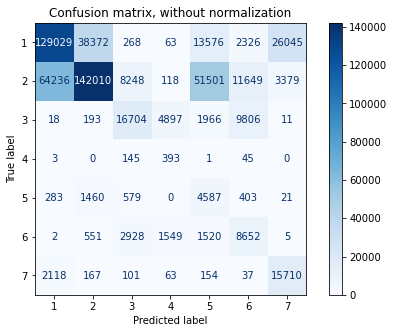

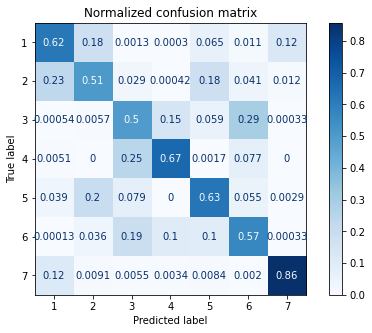

Overall accuracy: 56.03%


In [212]:
PrintResults()

# Add Weighting to Account for Test Data populations

In [213]:
weights = np.bincount(log_predictions)[1:] / log_predictions.shape[0]
weights = dict(enumerate(weights.flatten(), 1))

weights
# Save this method for hyper parameter tuning

{1: 0.34580626692018973,
 2: 0.322946781364642,
 3: 0.05119881532165148,
 4: 0.012516522587348823,
 5: 0.1295388519364119,
 6: 0.05817011019770557,
 7: 0.07982265167205049}

In [214]:
## Create current best classifier
log_model = LogisticRegression(C=1000, penalty = 'l2', solver="liblinear", multi_class="auto", class_weight = weights)

# fit to training data
log_model.fit(train_df, train_labels_df)

# supply the test_df to log_model and create predictions
log_predictions = log_model.predict(test_df)

# converts predictions from np array to pd dataframe
log_predictions_df = pd.DataFrame(data = log_predictions, 
                                  index = test_index_df, 
                                  columns = ["Cover_Type"])

log_score = accuracy_score(test_labels_correct["Cover_Type"].to_numpy(), 
                           log_predictions_df["Cover_Type"].to_numpy())

              precision    recall  f1-score   support

           1       0.62      0.69      0.65    209679
           2       0.73      0.64      0.68    281141
           3       0.68      0.19      0.30     33595
           4       0.08      0.31      0.12       587
           5       0.07      0.24      0.11      7333
           6       0.35      0.38      0.36     15207
           7       0.44      0.75      0.55     18350

    accuracy                           0.62    565892
   macro avg       0.42      0.46      0.40    565892
weighted avg       0.66      0.62      0.63    565892



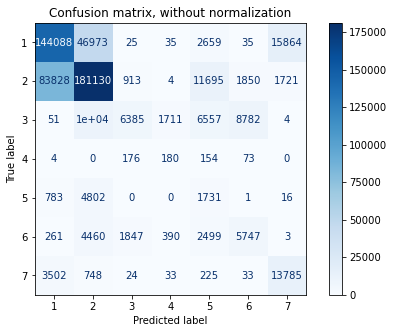

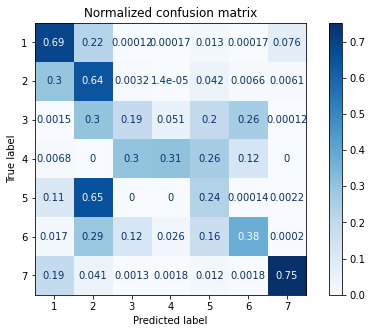

Overall accuracy: 62.39%


In [215]:
PrintResults()

# Remove outliers from training data and see if it improves

In [144]:
def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [145]:
# loop through all columns to see if there are any outliers
for column in train_df.columns:
    if outlier_function(train_df, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(train_df, column)[2], column))

There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 49 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points
There are 3597 outliers in Wilderness_Area1
There are 499 outliers in Wilderness_Area2
There are 355 outliers in Soil_Type1
There are 623 outliers in Soil_Type2
There are 962 outliers in Soil_Type3
There are 843 outliers in Soil_Type4
There are 165 outliers in Soil_Type5
There are 650 outliers in Soil_Type6
There are 1 outliers in Soil_Type8
There are 10 outliers in Soil_Type9
There are 2142 outliers in Soil_Type10
There are 406 outliers in Soil_Type11
There are 227 outliers in Soil_Type12
There are 476 outliers in Soil_Type13
There are 169 outliers in Soil_Type14
There are 114 outliers in Soil_Type16
There are 612 outliers in Soil_Type17
There are 60 outliers in Soil_Type18
There a

In [156]:
# Drop Values below 1Q
indexNames = train_df[train_df['Horizontal_Distance_To_Fire_Points'] < 
                      outlier_function(train_df, 'Horizontal_Distance_To_Fire_Points')[0]].index
ftr_train_df = train_df.drop(indexNames)
ftr_train_labels_df = train_labels_df.drop(indexNames)

# Drop Values above 3Q
indexNames = train_df[train_df['Horizontal_Distance_To_Fire_Points'] > 
                      outlier_function(train_df, 'Horizontal_Distance_To_Fire_Points')[1]].index
ftr_train_df = train_df.drop(indexNames)
ftr_train_labels_df = train_labels_df.drop(indexNames)



In [193]:
## Create current best classifier
log_model = LogisticRegression(C=1000, penalty = 'l2', solver="liblinear", multi_class="auto", class_weight = weights)

# fit to training data
log_model.fit(ftr_train_df, ftr_train_labels_df)

# supply the test_df to log_model and create predictions
log_predictions = log_model.predict(test_df)

# converts predictions from np array to pd dataframe
log_predictions_df = pd.DataFrame(data = log_predictions, 
                                  index = test_index_df, 
                                  columns = ["Cover_Type"])

log_score = accuracy_score(test_labels_correct["Cover_Type"].to_numpy(), 
                           log_predictions_df["Cover_Type"].to_numpy())

PrintResults()

ValueError: X has 55 features per sample; expecting 54

# Try Feature Engineering to see if we can improve model

In [177]:
train_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,2607,243,23,258,7,660,170,251,214,1282,...,0,0,0,0,0,0,0,0,0,0
15116,2603,121,19,633,195,618,249,221,91,1325,...,0,0,0,0,0,0,0,0,0,0
15117,2492,134,25,365,117,335,250,220,83,1187,...,0,0,0,0,0,0,0,0,0,0
15118,2487,167,28,218,101,242,229,237,119,932,...,0,0,0,0,0,0,0,0,0,0


In [180]:
test_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Average_Hillshade
0,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,196.0
1,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,201.0
2,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,206.0
3,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,208.0
4,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,210.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565887,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,240.0
565888,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,240.0
565889,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,236.0
565890,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,230.0


In [192]:
train_df['Average_Hillshade'] = ((train_df['Hillshade_9am']**2 +
                                 train_df['Hillshade_9am']**2 + train_df['Hillshade_9am']**2)/3)**0.5

test_df['Average_Hillshade'] = ((test_df['Hillshade_9am']**2 +
                                 test_df['Hillshade_9am']**2 + test_df['Hillshade_9am']**2)/3)**0.5

In [181]:
train_df['Total_Distance_to_Hydrology'] = (train_df['Horizontal_Distance_To_Hydrology']**2 + 
                                           train_df['Vertical_Distance_To_Hydrology']**2)**0.5
test_df['Total_Distance_to_Hydrology'] = (test_df['Horizontal_Distance_To_Hydrology']**2 + 
                                          test_df['Vertical_Distance_To_Hydrology']**2)**0.5
train_df = train_df.drop(columns=["Horizontal_Distance_To_Hydrology"])
train_df = train_df.drop(columns=["Vertical_Distance_To_Hydrology"])
test_df = test_df.drop(columns=["Horizontal_Distance_To_Hydrology"])
test_df = test_df.drop(columns=["Vertical_Distance_To_Hydrology"])

In [182]:
train_df['Total_Distance_to_Hydrology'] = ((train_df['Total_Distance_to_Hydrology'] - train_df['Total_Distance_to_Hydrology'].min()) /
                (train_df['Total_Distance_to_Hydrology'].max() - train_df['Total_Distance_to_Hydrology'].min()))

test_df['Total_Distance_to_Hydrology'] = ((test_df['Total_Distance_to_Hydrology'] - test_df['Total_Distance_to_Hydrology'].min()) /
                 (test_df['Total_Distance_to_Hydrology'].max() - test_df['Total_Distance_to_Hydrology'].min()))

train_df['Roadway_Distance_Normal'] = ((train_df['Horizontal_Distance_To_Roadways'] - train_df['Horizontal_Distance_To_Roadways'].min()) /
                (train_df['Horizontal_Distance_To_Roadways'].max() - train_df['Horizontal_Distance_To_Roadways'].min()))

test_df['Roadway_Distance_Normal'] = ((test_df['Horizontal_Distance_To_Roadways'] - test_df['Horizontal_Distance_To_Roadways'].min()) /
                 (test_df['Horizontal_Distance_To_Roadways'].max() - test_df['Horizontal_Distance_To_Roadways'].min()))

train_df['Fire_Points_Distance_Normal'] = ((train_df['Horizontal_Distance_To_Fire_Points'] - train_df['Horizontal_Distance_To_Fire_Points'].min()) /
                (train_df['Horizontal_Distance_To_Fire_Points'].max() - train_df['Horizontal_Distance_To_Fire_Points'].min()))

test_df['Fire_Points_Distance_Normal'] = ((test_df['Horizontal_Distance_To_Fire_Points'] - test_df['Horizontal_Distance_To_Fire_Points'].min()) /
                 (test_df['Horizontal_Distance_To_Fire_Points'].max() - test_df['Horizontal_Distance_To_Fire_Points'].min()))

train_df['Elevation_Normal'] = ((train_df['Elevation'] - train_df['Elevation'].min()) /
                (train_df['Elevation'].max() - train_df['Elevation'].min()))

test_df['Elevation_Normal'] = ((test_df['Elevation'] - test_df['Elevation'].min()) /
                 (test_df['Elevation'].max() - test_df['Elevation'].min()))

train_df = train_df.drop(columns=["Horizontal_Distance_To_Roadways"])
test_df = test_df.drop(columns=["Horizontal_Distance_To_Roadways"])
train_df = train_df.drop(columns=["Horizontal_Distance_To_Fire_Points"])
test_df = test_df.drop(columns=["Horizontal_Distance_To_Fire_Points"])
train_df = train_df.drop(columns=["Elevation"])
test_df = test_df.drop(columns=["Elevation"])
train_df.head()

,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,...,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Average_Hillshade,Total_Distance_to_Hydrology,Roadway_Distance_Normal,Fire_Points_Distance_Normal,Elevation_Normal
0,51,3,221,232,148,1,0,0,0,0,...,0,0,0,0,0,221.0,0.190134,0.074020,0.897898,0.369084
1,56,2,220,235,151,1,0,0,0,0,...,0,0,0,0,0,220.0,0.156296,0.056604,0.890176,0.366062
2,139,9,234,238,135,1,0,0,0,0,...,0,0,0,0,0,234.0,0.203229,0.461538,0.875304,0.473817
3,155,18,238,238,122,1,0,0,0,0,...,0,0,0,0,0,238.0,0.198414,0.448476,0.888174,0.464250
4,45,2,220,234,150,1,0,0,0,0,...,0,0,0,0,0,220.0,0.112756,0.056749,0.882597,0.368580


In [161]:
train_df

,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,...,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Average_Hillshade,Total_Distance_to_Hydrology,Roadway_Distance_Normal,Fire_Points_Distance_Normal,Elevation_Normal
0,51,3,221,232,148,1,0,0,0,0,...,0,0,0,0,0,221.0,0.190134,0.074020,0.897898,0.369084
1,56,2,220,235,151,1,0,0,0,0,...,0,0,0,0,0,220.0,0.156296,0.056604,0.890176,0.366062
2,139,9,234,238,135,1,0,0,0,0,...,0,0,0,0,0,234.0,0.203229,0.461538,0.875304,0.473817
3,155,18,238,238,122,1,0,0,0,0,...,0,0,0,0,0,238.0,0.198414,0.448476,0.888174,0.464250
4,45,2,220,234,150,1,0,0,0,0,...,0,0,0,0,0,220.0,0.112756,0.056749,0.882597,0.368580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,243,23,170,251,214,0,0,1,0,0,...,0,0,0,0,0,170.0,0.190204,0.095791,0.183326,0.374622
15116,121,19,249,221,91,0,0,1,0,0,...,0,0,0,0,0,249.0,0.488124,0.089695,0.189475,0.372608
15117,134,25,250,220,83,0,0,1,0,0,...,0,0,0,0,0,250.0,0.282469,0.048621,0.169741,0.316717
15118,167,28,229,237,119,0,0,1,0,0,...,0,0,0,0,0,229.0,0.177060,0.035123,0.133276,0.314199


In [162]:
test_df


,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,...,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Average_Hillshade,Total_Distance_to_Hydrology,Roadway_Distance_Normal,Fire_Points_Distance_Normal,Elevation_Normal
0,354,14,196,214,156,1,0,0,0,0,...,0,0,0,0,0,196.0,0.000000,0.377125,0.926391,0.410705
1,0,13,201,216,152,1,0,0,0,0,...,0,0,0,0,0,201.0,0.000000,0.372910,0.930573,0.412206
2,16,15,206,208,137,1,0,0,0,0,...,0,0,0,0,0,206.0,0.000000,0.418716,0.884428,0.427214
3,24,17,208,201,125,1,0,0,0,0,...,0,0,0,0,0,208.0,0.000000,0.414500,0.888610,0.425213
4,29,19,210,195,115,1,0,0,0,0,...,0,0,0,0,0,210.0,0.000000,0.410285,0.892792,0.423712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565887,153,20,240,237,118,0,0,1,0,0,...,0,0,0,0,0,240.0,0.061091,0.015175,0.116688,0.268634
565888,152,19,240,237,119,0,0,1,0,0,...,0,0,0,0,0,240.0,0.047970,0.013348,0.117803,0.266133
565889,159,17,236,241,130,0,0,1,0,0,...,0,0,0,0,0,236.0,0.042573,0.012646,0.119058,0.263632
565890,170,15,230,245,143,0,0,1,0,0,...,0,0,0,0,0,230.0,0.042432,0.012646,0.120452,0.262631
